# NLTK

**Corpus**
+ Large collection of words or phases such as dictionary
+ Example: Documents, web sources, database

**token**
+ Tokenization: process of converting TEXT to TOKENS.
+ Tokens: Words, phases extracted from documents or web sources.
+ Text Object: sentence or phrase or word or article.

+ API ==> NLTK for more tasks such as preprocessing , vectorized representation of text

**Feature vector**
+ A numeric array that ML models use for training and classification/regression
tasks.

In [1]:
import nltk

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

#### **1- pre-processing**
    - Raw Text (input)
    - Noise Removal: 
    - Lexicon Normalization
    - Object Standardization
    - Clean Text (output)

**+ Pipline:**
- **Raw Text**
- **Noise Removal**: Remove words elly mlha4 lazma
    * Stopwords (i,am,the,a,he,)
    * URLs: https://www.google.com/
    * Punctuations: ? , ! ; . 
    * Mentions: @
    * HTML and XML markup: <p> This is a dataset .. </ p>
    * Twitter mark-up (names, hash tags): #aws #amazon #tesla
    * Capitalization: Acronyms: NASA, ETA etc.
    * Phone numbers, dates: +14256565, 12/11/2013
    * Emojis
    * Emoticons
- **Word Normalization** or **Lexicon Normalization**: player,plays,played,playing = play
    * Tokenization 
    * Lemmatization 
    * Stemming
- **Word Standardizaion** or **Object Standardization**: ISA = Inshallah
    * Regular
    * Expression
    * Lookup Tables
- **Clean Text**:

### **1.1- Noise Removal**
+ Remove words elly mlha4 lazma

implementaion Noise Removal

In [ ]:
def remove_noise(raw_text):
    '''
    create list from stopwords
    convert text to lowercase and split it as list
    loop on each word and remove noises
    convert list to text
    '''
    stopwords = ['is','the','a','...','this','there','are','i']
    words = raw_text.lower().split()
    # filter stopwords from words
    filter = [word for word in words if word not in stopwords]
    text = " ".join(filter)
    return text

print(remove_noise("hey This this hello The hal there"))

Noise Removal used built-in function 

In [33]:
from nltk.corpus import stopwords       # include noise words
from nltk.tokenize import word_tokenize # split text

def remove_noise(raw_data):
    '''
    create set from stopwords function
    convert text to lowercase and split it as list with built-in function
    loop on each word and remove noises
    convert list to text
    '''
    stop_words = stopwords.words('english')
    word_tokens = word_tokenize(raw_data.lower())    # split text to list
        # filter stopwords from words

    filter = [word for word in word_tokens if word not in stop_words]
    text = " ".join(filter)
    return text

print(remove_noise("hey This this hello The hal there"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### **1.2- Lexicon Normalization**
+ Lemma: play,player,plays,played,playing = play

**1.2.1- Tokenization**
+ Word tokenization: function is used to split the input text into individual words and return list of strings

+ sentence tokenization: function is used to split the input text into individual sentences and return list of strings

In [1]:
from nltk import word_tokenize , sent_tokenize
    
text = open(r"word_send_tokenize.txt",'r').read()
print(f"Text:\n{text}")
print(f"Word Tokenize:\n{word_tokenize(text.lower())}")
print(f"Sentance Tokenize:\n{sent_tokenize(text)}") # ! or ? or .

Text:
Today, the result is The spirit desires. But the flesh is weak. Which isn't perfect. But inspires much more confidence in the English-to-Russian translation.

Word Tokenize:
['today', ',', 'the', 'result', 'is', 'the', 'spirit', 'desires', '.', 'but', 'the', 'flesh', 'is', 'weak', '.', 'which', 'is', "n't", 'perfect', '.', 'but', 'inspires', 'much', 'more', 'confidence', 'in', 'the', 'english-to-russian', 'translation', '.']
Sentance Tokenize:
['Today, the result is The spirit desires.', 'But the flesh is weak.', "Which isn't perfect.", 'But inspires much more confidence in the English-to-Russian translation.']


**1.2.2- Stemming**
+ remove all word additions: ing , er , s , es ,ly , ed

In [28]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer() # lazm create obect from class PorterStemmer
# method stem take one word and to_lowercase is default is True
print(stemmer.stem("playing"))                   # meaning is understandable
print(stemmer.stem("HeLPing", to_lowercase=True))# meaning is understandable
print(stemmer.stem("play plays playing player")) # meaning is not understandable, should be on word
print(stemmer.stem("communication"))             # meaning is not understandable, fixed it in lemmatization

play
help
commun
play plays playing play


**1.2.3- lemmatization**
+ get root form of word 
+ get Vocabulary (dictionary importance of words) 
+ get Morphological analysis (word structure and grammer relations)

In [30]:
from nltk import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
# method lemmatize take on word and "v" for verbs
print(lemmatizer.lemmatize("playing", 'v'))
print(lemmatizer.lemmatize("HeLPing")) # not found to_lowercase
print(lemmatizer.lemmatize("play plays playing player")) # should be on word
print(lemmatizer.lemmatize("communication", 'v'))

play
HeLPing
communication
play plays playing player


### **1.3- Object Standardization**
+ ISA = Inshallah
+ LUV = Love

In [44]:
# abbreviation
# original
lookup_dict = {'rt':'retweet',
               'dm':'direct message',
               'awsm':'awesome',
               'luv':'love'}
def lookup_word(text):
    '''
    convert text to lowercase and make split it
    create new list to put original text in it
    for on lookup_dict to convert abbreviation to original
        check if key or abbreviation in lookup_dict
            take his value (original)
        and added this value new list
        convert list to text 
    return text
    '''
    tokens = text.lower().split()
    original= []
    for abbreviation in tokens:
        if abbreviation in lookup_dict:
            abbreviation= lookup_dict[abbreviation]
        original.append(abbreviation)
        text= " ".join(original)
    return text
    
print(lookup_word("rt dm awsm luv"))

retweet direct message awesome love


### **ALL STEPS PRE-PROECSSING**

In [4]:
import re # regular expressions: to select specific pattern
from nltk import word_tokenize , sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

def preprocess(text):
    # Noise Removal
    text = re.sub(r'https?:\/\/\S+', '', text) # Remove URLs
    text = re.sub(r'\b@\w+\b', '', text) # Remove mentions
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
        # convert text to tokens
    tokens= word_tokenize(text.lower())
        # remove stop words
    stop_words = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop_words] # Remove stopwords
    
    # Word Normalization
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens] # Stemming
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens] # Lemmatization

    # Word Standardization
    lookup_table = {
        "isa": "inshallah",
        "brb": "be right back",
        "lol": "laugh out loud"
    }
    tokens = [lookup_table.get(token, token) for token in tokens] # Replace with lookup table

    # Convert tokens back to string
    text = ' '.join(tokens)

    return text


input_text = open(r"pre-processing.txt",'r').read()
print(preprocess(input_text))

im play soccer friend play soccer realli well play yesterday play tomorrow inshallah ill win time laugh out loud


In [2]:
from nltk import word_tokenize

In [5]:
text = "Today, brb result lol isa."
tokens = word_tokenize(text.lower())
lookup_table = {
"isa": "inshallah",
"brb": "be right back",
"lol": "laugh out loud",
}
tokens = [lookup_table.get(token, token) for token in tokens] # Replace with lookup table
tokens

['today', ',', 'be right back', 'result', 'laugh out loud', 'inshallah', '.']

# WordNet

WordNet is a lexical `database of the English` language that relates words to one another in terms of synonyms, hypernyms, hyponyms, and more. In natural language processing (NLP), WordNet is often used to find synonyms and antonyms for words.

In [2]:
from nltk.corpus import wordnet

+ synonym : مرادف / سني نم
+ antonym : مضادة / انت نم

In [3]:
syns = wordnet.synsets("go")
syns

[Synset('go.n.01'),
 Synset('adam.n.03'),
 Synset('crack.n.09'),
 Synset('go.n.04'),
 Synset('travel.v.01'),
 Synset('go.v.02'),
 Synset('go.v.03'),
 Synset('become.v.01'),
 Synset('go.v.05'),
 Synset('run.v.05'),
 Synset('run.v.03'),
 Synset('proceed.v.04'),
 Synset('go.v.09'),
 Synset('go.v.10'),
 Synset('sound.v.02'),
 Synset('function.v.01'),
 Synset('run_low.v.01'),
 Synset('move.v.13'),
 Synset('survive.v.01'),
 Synset('go.v.16'),
 Synset('die.v.01'),
 Synset('belong.v.03'),
 Synset('go.v.19'),
 Synset('start.v.09'),
 Synset('move.v.15'),
 Synset('go.v.22'),
 Synset('go.v.23'),
 Synset('blend.v.02'),
 Synset('go.v.25'),
 Synset('fit.v.02'),
 Synset('rifle.v.02'),
 Synset('go.v.28'),
 Synset('plump.v.04'),
 Synset('fail.v.04'),
 Synset('go.a.01')]

we see that found more words `synonym` for word `go` 

In [4]:
syns[0].name()

'go.n.01'

In [5]:
syns[0].definition()

'a time for working (after which you will be relieved by someone else)'

In [6]:
syns[0].examples()

["it's my go", 'a spell of work']

تصريف الفعل

In [7]:
syns[0].lemmas()

[Lemma('go.n.01.go'),
 Lemma('go.n.01.spell'),
 Lemma('go.n.01.tour'),
 Lemma('go.n.01.turn')]

get synonyms 

In [11]:
def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return set(synonyms)

synonyms = get_synonyms('happy')
synonyms

{'felicitous', 'glad', 'happy', 'well-chosen'}

use set to remove duplicates

get antonyms 

In [12]:
def get_antonyms(word):
    antonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            if lemma.antonyms():
                antonyms.append(lemma.antonyms()[0].name())
    return set(antonyms)

antonyms = get_antonyms('happy')
antonyms

{'unhappy'}

get synonyms and antonyms

In [15]:
def get_synonyms_antonyms(word):
    synonyms = []
    antonyms = []

    for syn in wordnet.synsets(word): # get synonyms
        for lemma in syn.lemmas(): # get lemmas for each synonym
            synonyms.append(lemma.name())
            if lemma.antonyms():
                antonyms.append(lemma.antonyms()[0].name())
                
    return set(synonyms), set(antonyms)

synonyms, antonyms = get_synonyms_antonyms('good')
print("synonyms:")
print(synonyms)
print("antonyms:")
print(antonyms)

synonyms:
{'adept', 'unspoilt', 'thoroughly', 'in_effect', 'safe', 'commodity', 'well', 'salutary', 'upright', 'skilful', 'sound', 'dear', 'in_force', 'proficient', 'expert', 'good', 'honest', 'near', 'dependable', 'goodness', 'ripe', 'secure', 'honorable', 'effective', 'unspoiled', 'skillful', 'beneficial', 'undecomposed', 'soundly', 'respectable', 'serious', 'just', 'estimable', 'right', 'practiced', 'trade_good', 'full'}
antonyms:
{'badness', 'bad', 'ill', 'evilness', 'evil'}


get similarity of words using `wup_similarity`

In [21]:
word1 = wordnet.synset('dog.n.01')
word2 = wordnet.synset('cat.n.01')
word1.wup_similarity(word2)

0.8571428571428571

two object are similar to each other

In [20]:
word1 = wordnet.synset('ship.n.01')
word2 = wordnet.synset('car.n.01')
word1.wup_similarity(word2)

0.6956521739130435

two objects are moving

In [ ]:
word1 = wordnet.synset('ship.n.01')
word2 = wordnet.synset('boat.n.01')
word1.wup_similarity(word2)

two objects are moving and are in sea

# Part of speech "POS"


refers to `grammatical category` of a word based on its syntactic functions and `relationships with other words` in a sentence.

Identifying the part of speech of each word is a crucial step in `understanding` the `structure and meaning` of a given `text`.

In [24]:
from nltk import pos_tag, word_tokenize

In [26]:
def get_pos(sent):
    tokens = word_tokenize(sent)
    pos_tags = pos_tag(tokens)
    return pos_tags

sentence = "The quick brown fox jumps over the lazy dog."
pos_tags = get_pos(sentence)
for word, pos in pos_tags:
    print(f"{word}: {pos}")

The: DT
quick: JJ
brown: NN
fox: NN
jumps: VBZ
over: IN
the: DT
lazy: JJ
dog: NN
.: .


!["pos_1"](imgs/pos_1.png)

`Adjective` (`JJ`): A word that describes or modifies a noun. Examples: `happy, red, tall.`


`Noun` (`NN`): A word that represents a person, place, thing, or idea. Examples: `dog, city, happiness.`

`Adverb` (`RB`): A word that modifies a verb, adjective, or other adverb and often expresses manner, time, place, or degree. Examples: `quickly, very, here.`

`Pronoun` (`PRP`): A word that takes the place of a noun. Examples: `he, she, it.`

`Conjunction` (`CC`): A word that connects words, phrases, or clauses. Examples: `and, but, or.`

`Determiner` (`DT`): A word that introduces a noun and specifies it as something particular. Examples: `the, a, this.`

`Preposition` (`IN`): A word that shows the relationship between a noun (or pronoun) and other elements in the sentence. Examples: `in, on, under.`

!["pos_2"](imgs/pos_2.png)

`Interjection` (`UH`): A word or phrase used to express strong emotion or sudden exclamations. Examples: `wow, oh, ouch.`

`Verb` (`VB`): A word that expresses an action, occurrence, or state of being. Examples: `run, eat, is.`

!["pos_3"](imgs/pos_3.png)

!["pos_4"](imgs/pos_4.png)

# `Chunking` is built on part of speech

technique that involves identifying and grouping together adjacent words in a sentence that form a meaningful unit, known as a "chunk." Unlike part-of-speech tagging, which labels individual words with their grammatical categories (such as nouns, verbs, etc.), chunking involves the extraction of larger syntactic units or phrases.

chunk is typically a phrase or a group of words that serve a specific grammatical role or convey a certain meaning. Common types of chunks include noun phrases (NP), verb phrases (VP), and prepositional phrases (PP).

In [3]:
from nltk import pos_tag, word_tokenize, RegexpParser

In [7]:
def get_chunking(sent):
    tokens = word_tokenize(sent)
    
    # Perform part-of-speech tagging
    pos_tags = pos_tag(tokens)
    
    # define pattern for chunking
    """
    `NP`: This is a `label` that specifies the `type of chunk`
    
    `{<DT>?<JJ>*<NN>}`: This is a `regular expression pattern`
    
    `<DT>?`: `Zero` or `one` determiner (optional)

    `<JJ>*`: `Zero` or `more` adjectives (optional)

    `<NN>`: `Exactly one` noun
    
    `{<NNP>*}`: one or more Proper noun
    
    `<NN><NN>`: two noun 

    "An `NP chunk` consists of an `optional determiner`, 
                    followed by `zero or more adjectives`, 
                    and finally, `exactly one noun`
    """
    chunk_pattern = r"""
    NP: {<DT>?<JJ>*<NN>}
        {<NNP>*}
        {<NN><NN>}
    """
    
    # Create a chunk parser with the defined pattern
    """
    The `RegexpParser` in NLTK (Natural Language Toolkit) is a regular-expression-based `parser 
    that allows you to define chunking patterns using regular expressions`. 
    It's useful for simple syntactic `analysis and chunking tasks` 
    where you want to define explicit patterns `based on part-of-speech tags`.
    """
    chunk_parser = RegexpParser(chunk_pattern)
    
    # Apply the chunk parser to the part-of-speech tagged words
    chunks = chunk_parser.parse(pos_tags)
    
    # Extract the chunks from the parsed result
    chunked_phrases = [subtree.leaves() for subtree in chunks.subtrees() if subtree.label() == 'NP']  # NP is chunk pattern

    return sent, pos_tags, chunked_phrases

sentence = "The quick brown fox jumps over the lazy dog, BBC"
sent, pos_tags, chunked_phrases = get_chunking(sentence)
print("Sent\n", sent)
print("pos_tags\n", pos_tags)
print("chunked_phrases\n", chunked_phrases)

Sent
 The quick brown fox jumps over the lazy dog, BBC
pos_tags
 [('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'VBZ'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN'), (',', ','), ('BBC', 'NNP')]
chunked_phrases
 [[('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN')], [('fox', 'NN')], [('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN')], [('BBC', 'NNP')]]


# `Chinking` is built on part of speech
+ Chunking = `select`, select chunks from sentence 
+ Chinking = `remove`, remove chunks from sentence

`Chinking` is the process of `excluding` certain `tokens from a chunk` that would normally be included based on a chunking rule. 

In other words, it's the `reverse of chunking`. While 

`chunking` involves `selecting specific patterns to form chunks`, 

`chinking` involves `specifying patterns to exclude from a chunk`.

In [22]:
def get_chinking(sent):
    tokens = word_tokenize(sent)
    
    # Perform part-of-speech tagging
    pos_tags = pos_tag(tokens)
    
    # Define a chunking pattern with chinking
    chunk_chink_pattern = r"""
    NP: {<DT>?<JJ>*<NN>}    # Chunk Noun Phrases
        }<VB.*>{            # Chink sequences of verbs
        }<NNP>{             # Chink sequences of noun phrases
        }<NN> <NN>{         # Chinking pattern to exclude consecutive nouns
    """
    
    # Create a chunk parser with the defined pattern
    chunk_chink_parser = RegexpParser(chunk_chink_pattern)
    
    # Apply the chunk parser to the part-of-speech tagged words
    chunks = chunk_chink_parser.parse(pos_tags)
    
    chunked_phrases = [subtree.leaves() for subtree in chunks.subtrees() if subtree.label() == 'NP']

    return sent, pos_tags, chunked_phrases

sentence = "The quick brown fox jumps over the lazy dog, BBC"
sent, pos_tags, chunked_phrases = get_chinking(sentence)
print("Sent\n", sent)
print("pos_tags\n", pos_tags)
print("chunked_phrases\n", chunked_phrases)

Sent
 The quick brown fox jumps over the lazy dog, BBC
pos_tags
 [('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'VBZ'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN'), (',', ','), ('BBC', 'NNP')]
chunked_phrases
 [[('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN')], [('fox', 'NN')], [('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN')]]


# 1. Vectorization or One hot encoding

word = feature = dimension

!["vectorization"](imgs/vectorization.png)

Cons:
- vector increasing when unique values
- increasing vectors will increase demiension will increase complexity
- not relationship between values

# 2. Count Vectorizer

!["count_vectorizer"](imgs/count_vectorizer.png)

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
Vectorizer = CountVectorizer()
x = ["Hello guys", "I am happy"]
values = Vectorizer.fit_transform(x)
print(values)
print('*'*9)
values = Vectorizer.fit_transform(x).toarray()
print(values)

  (0, 3)	1
  (0, 1)	1
  (1, 0)	1
  (1, 2)	1
*********
[[0 1 0 1]
 [1 0 1 0]]


In [9]:
names = Vectorizer.get_feature_names_out()
names

array(['am', 'guys', 'happy', 'hello'], dtype=object)

In [10]:
import pandas as pd
pd.DataFrame(values, columns=names)

,am,guys,happy,hello
0,0,1,0,1
1,1,0,1,0


test on dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"datasets/yelp.csv")
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [4]:
df['stars'].value_counts()

stars
4    3526
5    3337
3    1461
2     927
1     749
Name: count, dtype: int64

In [5]:
df_stars_1_5 = df[(df['stars'] == 1) | (df['stars'] == 5)]
df_stars_1_5['stars'].value_counts()

stars
5    3337
1     749
Name: count, dtype: int64

.values to convert series or dataframe to list or numpy

In [6]:
x= df_stars_1_5['text'].values
y = df_stars_1_5['stars'].values

In [9]:
type(x)

numpy.ndarray

In [18]:
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [13]:
x[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

replace any thing not characters to space

In [16]:
re.sub('[^a-zA-Z]', ' ', x[0])

'My wife took me here on my birthday for breakfast and it was excellent   The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure   Our waitress was excellent and our food arrived quickly on the semi busy Saturday morning   It looked like the place fills up pretty quickly so the earlier you get here the better   Do yourself a favor and get their Bloody Mary   It was phenomenal and simply the best I ve ever had   I m pretty sure they only use ingredients from their garden and blend them fresh when you order it   It was amazing   While EVERYTHING on the menu looks excellent  I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious   It came with   pieces of their griddled bread with was amazing and it absolutely made the meal complete   It was the best  toast  I ve ever had   Anyway  I can t wait to go back '

1. Preprocessing

In [20]:
corpus= []
for row in range(0,len(x)):
    reviews = re.sub('[^a-zA-Z]', ' ', x[row])
    reviews = word_tokenize(reviews.lower())
    stemmer = PorterStemmer()
    stop_words = stopwords.words('English')
    stop_words.remove('not')
    reviews = [stemmer.stem(word) for word in reviews if word not in stop_words]
    reviews = ' '.join(reviews)
    corpus.append(reviews)

In [23]:
type(corpus)

list

2. Vectorization

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
Vectorizer = CountVectorizer()
x = Vectorizer.fit_transform(corpus).toarray()
names = Vectorizer.get_feature_names_out()
names

array(['aa', 'aaa', 'aaaamaz', ..., 'zwftv', 'zwiebel', 'zzed'],
      dtype=object)

In [42]:
len(Vectorizer.get_feature_names_out())

12998

In [43]:
df = pd.DataFrame(x, columns= names)
df

,aa,aaa,aaaamaz,aaammmazz,aaron,ab,aback,abandon,abba,abbi,...,zucca,zucchini,zuccini,zuchinni,zumba,zupa,zuzu,zwftv,zwiebel,zzed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


3. Training

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
classifier = RandomForestClassifier()
model = classifier.fit(x_train, y_train)
model

RandomForestClassifier()

In [48]:
preds = classifier.predict(x_test)
preds

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
confusion_matrix(y_test,preds)

array([[ 93, 132],
       [  6, 995]], dtype=int64)

In [55]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.94      0.41      0.57       225
           5       0.88      0.99      0.94      1001

    accuracy                           0.89      1226
   macro avg       0.91      0.70      0.75      1226
weighted avg       0.89      0.89      0.87      1226



# 3. TF-IDF Term Frequency - Inverse Document Frequency


is better than `CountVectorizer`

!["tfidf"](imgs/tfidf_1.png)

!["tfidf_2"](imgs/tfidf_2.png)

- 20 sentences
- 5 words 
- word appear in `one sentence` then tf = count_word/ len_sentance = `1/5`
- idf = log(len_sentance/ count_word) = `log(20/1)`
- result = tf * idf = `1/5 * log(20/1)`

- special case: in case `df = 0` means count_word is 0, we `add one to df`: log(len_sentance/ count_word + 1) to `avoid division by zero`

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

In [4]:
def create_table(lst, vectorizer):
    matrix = vectorizer.fit_transform(lst).toarray()
    names = vectorizer.get_feature_names_out()
    return pd.DataFrame(matrix, columns=names)

In [5]:
test_1 = ["He likes to play football so much that", 
          "He likes to eats everything"]
cv = CountVectorizer()
create_table(test_1, cv)

,eats,everything,football,he,likes,much,play,so,that,to
0,0,0,1,1,1,1,1,1,1,1
1,1,1,0,1,1,0,0,0,0,1


In [6]:
test_1 = ["He likes to play football so much that", 
          "He likes to eats everything"]
tfidf = TfidfVectorizer()
create_table(test_1, tfidf)

,eats,everything,football,he,likes,much,play,so,that,to
0,0.000000,0.000000,0.391668,0.278675,0.278675,0.391668,0.391668,0.391668,0.391668,0.278675
1,0.533098,0.533098,0.000000,0.379303,0.379303,0.000000,0.000000,0.000000,0.000000,0.379303


we see `TfidfVectorizer` based on `frequency` which is better than `CountVectorizer`

Problem `TfidfVectorizer` make vectorizer on sentence not `word`, and not importance `means of words` (play= 0.391668, that= 0.391668) that take same value in sentence.

# Word2Vec


convert Word to vector

In [5]:
import gensim.downloader as api

Download a pre-trained Word2Vec model

In [7]:
model = api.load("word2vec-google-news-300")

Accessing the vector for a word

In [ ]:
word_vector = model['Hello'] 
print(f"Vector for 'example_word': {word_vector}")

print `300 values` for word `Hello`

In [ ]:
import numpy as np
word1 = model['king']
word2 = model['queen']
print(np.linalg.norm(word1 - word2))

subtract two words from each other

In [ ]:
model.most_similar('iphone')

In [ ]:
model.similarity('iphone', 'android')

In [ ]:
model.most_similar(positive=['woman', 'king'], negative=['man'])

get more words similar to `woman + king - man`

In [ ]:
model.doesnt_match("house garage store sea".split())

Get words `not matching` with sentence

RULE:

similarity_rule = `A * B / ||A|| * ||B||`

when cos(angle) is `large` then two words are `more` similar

when cos(angle) is `small` then two words are `less` similar

# Glove : unsupervised vectorizer

for search ...

**Algoritms convert text to numbers**
+ Bag of words
+ TF-IDF
+ Unigram
+ Bigram

In [1]:
# Text analysis using nltk.text
from nltk.text import Text
from nltk.tokenize import word_tokenize

In [3]:
# convert Text to Tokenize
my_string = "two plus two equal four , my name is mohamed salah , RT this is a retweeted tweet by shivam Bansal ,  DM for message , i am mohamed "
tokens = word_tokenize(my_string)
print(tokens)

['two', 'plus', 'two', 'equal', 'four', ',', 'my', 'name', 'is', 'mohamed', 'salah', ',', 'RT', 'this', 'is', 'a', 'retweeted', 'tweet', 'by', 'shivam', 'Bansal', ',', 'DM', 'for', 'message', ',', 'i', 'am', 'mohamed']


In [4]:
# convert Tokenize to Text
text= Text(tokens)
print(text)

<Text: two plus two equal four , my name...>


In [5]:
# make slicing
print(tokens[1:6])

['plus', 'two', 'equal', 'four', ',']


In [11]:
# takes a word as input,
# displays all the matches of the word in the text
# width: number of characters displayed per line, default is 80 char
# lines: number of lines displayed in the output, default is 25 line
text.concordance("mohamed", width=15,lines=6) 

Displaying 2 of 2 matches:
 is mohamed sal
 am mohamed 


In [13]:
# display sequence of words that together more frequently 
# display top 20 most frequent collocations.
# collocations are sequence of words
text.collocations() 
'''
uses a statistical measure called pointwise mutual information (PMI)
identify the most significant collocations in the text.
'''

'\nuses a statistical measure called pointwise mutual information (PMI)\nidentify the most significant collocations in the text.\n'

In [17]:
# number of times this word "appears" in the text.
text.count("equal")

1

In [20]:
# index of the "first" occurrence of the word in the text.
text.index("two")

0

In [25]:
# find words that have a similar context as the given word
text.similar("four")  #bgeb el kalma el match m3aha 

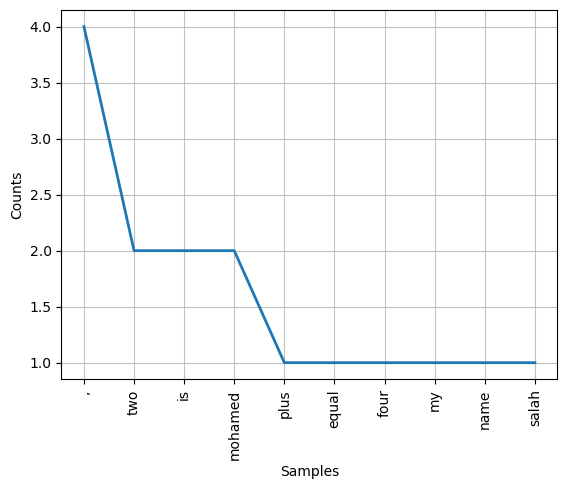

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [26]:
text.plot(10)

In [ ]:
import nltk
nltk.download("reuters")

In [ ]:
from nltk.corpus import reuters
text = Text(reuters.words())
print(text)
 
text.common_contexts(["February","August"])

In [13]:
from nltk import ngrams
sentence = " i am from egypt ."
n=3
unigrams= ngrams(sentence.split(),n)
for grams in unigrams:
  print(grams)

('i', 'am', 'from')
('am', 'from', 'egypt')
('from', 'egypt', '.')


In [ ]:
from nltk.corpus import stopwords
stopwords.readme().replace('\n','')


In [ ]:
stopwords.fileids()

In [ ]:
stopwords.raw('arabic')

In [ ]:
stopwords.raw('french')

In [ ]:
stopwords.raw("english")

# Tips

Transformers, like many sequence-to-sequence models, need to be trained with input sequences that predict the next word in a sequence. This requires a specific way of preparing the target sequences:

- Input Sequences: The input sequences remain as they are.

- Response Sequences: These sequences are used to create both the decoder input and the decoder output sequences.

    + Decoder Input: The target sequences are shifted right by one position. This means that the model sees the start of a sentence and predicts the next word at each step.

    + Decoder Output: This is the actual target sequence which the model should predict.

Here's how this looks in practice:

For a given target sequence: [START, How, are, you, doing, ?]

Decoder Input: [START, How, are, you, doing]

Decoder Output: [How, are, you, doing, ?]

- 1.4.1- `Tokenization` using Tokenizer class and fit_on_texts method

    - Convert texts to tokens 

- 1.4.2- `Sequences` using texts_to_sequences method

    - Convert tokens to Sequences, return sequences

- 1.4.3- `Padding` using pad_sequences method

    - Convert Sequences to pad sequences
    - Ensuring all sequences have the same length.
    - Return pad_sequences

- 1.4.4-  `split 'pad_sequences' array` to input_pad_sequences and target_pad_sequences
    - If we build transformer
    - For prepare Decoder Input and Output Sequences

- 1.4.5- `Split data` using train_test_split method

    - Perform the train-test split on the padded sequences with 